In [1]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

from PIL import Image
import requests
from io import BytesIO
import pytesseract

/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/williamsa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [4]:
messy_df.head()

,created_utc,num_comments,subreddit,subreddit_subscribers,text,title,upvote_ratio,url,image?
0,1.502177e+09,840.0,TheRedPill,0.0,"As reported in Bloomberg, Google has fired a s...",Google Fires Ph.D Biologist/Engineer For Claim...,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False
1,1.480424e+09,759.0,TheRedPill,0.0,**A complete guide to picking up 9s and 10s** ...,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False
2,1.502101e+09,179.0,TheRedPill,0.0,**Practical Stoicism Tools**\n\nStoicism philo...,I have been practicing Stoicism for 3 years no...,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False
3,1.433962e+09,954.0,TheRedPill,0.0,The most notorious target was FatPeopleHate. Y...,"[META] Reddit rolls out first ban wave of ""Har...",0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False
4,1.500270e+09,336.0,TheRedPill,0.0,Kind of surprised this hasn't made its way her...,"Man gets his ex-GF to pay child support, and R...",0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False


In [5]:
#TODO: Image processing: do on windows machine because tessaract only runs on linux and windows

# image_text = []

# for index, row in messy_df.iterrows():
#     if row['image?']:
#         response = requests.get(row['url'])
#         image = Image.open(BytesIO(response.content))
#         image_string = pytesseract.image_to_string(image)
#     else:
#         image_string = ''

#     print(image_string)
#     image_text.append(image_string)


In [6]:
messy_df['total_text'] = messy_df['title'] + ' ' + messy_df['text']

In [7]:
messy_df = messy_df.drop(columns= ['title', 'text'])

In [8]:
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                      The is Los Angeles, California 
11005                                   Personal freedoms 
11006                                 Progressive Liberal 
11007                                               Welp… 
11008                                 You guys were right 
Name: total_text, Length: 11009, dtype: object

In [9]:
messy_df['total_text']

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
11004                      The is Los Angeles, California 
11005                                   Personal freedoms 
11006                                 Progressive Liberal 
11007                                               Welp… 
11008                                 You guys were right 
Name: total_text, Length: 11009, dtype: object

In [10]:
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['’', "'s", "n't", "''", '``', '--', '”', '“', "'m", '...', "'ll", "'d", '‘', "'re", "'ve", "\\-", '—', '–', 'x200b', '..']

stopwords_ += ['r', 'www', 'https', 'http', 'com', 'post', 'sub', 'account', 'imgur', 'amp'] #commonly used reddit link words
# stopwords_ += ['like', 'would', 'much', 'also', 'really', 'even', 'gt', 'us', 'never', 'see', 'way', 'could', 'back', 'need', 'take', 'get',
#                  'one', 'time', 'want', 'make', 'know', 'thing', 'got', 'many', 'every', 'let', 'lot', 'ever', 'around', 'put', 'enough',
#                  'sure', 'may', 'must', 'went', 'often', 'might', 'get', 'probably', 'literally', 'though', 'else', 'least', 'yet', 'set', 
#                  'oh', 'na', 'finally', 'nbsp', 'almost', 'simply', 'wo', 'whatever', 'sometimes', 'completely', 'permanently', 'actual', 'possible',
#                  'absolutely', 'within', 'including', 'thing', 'something'] #common words in the dataset

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
def stop_and_lemmatize(string):
    """
    Helper function for eda on the total corpus
    """
    #current = re.split(r'[^a-zA-Z]', string)
    current = word_tokenize(string)

    total = [x.lower() for x in current if x.lower() not in stopwords_]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [13]:
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

In [14]:
messy_df

,created_utc,num_comments,subreddit,subreddit_subscribers,upvote_ratio,url,image?,total_text,tokenned_stopped_text
0,1.502177e+09,840.0,TheRedPill,0.0,0.65,https://www.reddit.com/r/TheRedPill/comments/6...,False,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim..."
1,1.480424e+09,759.0,TheRedPill,0.0,0.82,https://www.reddit.com/r/TheRedPill/comments/5...,False,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[get, laid, like, warlord, 37, rule, approachi..."
2,1.502101e+09,179.0,TheRedPill,0.0,0.86,https://www.reddit.com/r/TheRedPill/comments/6...,False,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,..."
3,1.433962e+09,954.0,TheRedPill,0.0,0.87,https://www.reddit.com/r/TheRedPill/comments/3...,False,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi..."
4,1.500270e+09,336.0,TheRedPill,0.0,0.90,https://www.reddit.com/r/TheRedPill/comments/6...,False,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,..."
...,...,...,...,...,...,...,...,...,...
11004,1.633457e+09,900.0,Anarcho_Capitalism,186148.0,0.88,https://v.redd.it/0ptsjdwh9or71,False,"The is Los Angeles, California","[los, angeles, california]"
11005,1.632157e+09,2229.0,Anarcho_Capitalism,186148.0,0.83,https://i.redd.it/xmgcuoawtoo71.png,True,Personal freedoms,"[personal, freedom]"
11006,1.591131e+09,141.0,Anarcho_Capitalism,186148.0,0.93,https://i.imgur.com/ticpuuy.jpg,True,Progressive Liberal,"[progressive, liberal]"
11007,1.638208e+09,506.0,Anarcho_Capitalism,186148.0,0.89,https://i.redd.it/dcyjbpirmk281.jpg,True,Welp…,[welp…]


In [15]:
corpus_series = messy_df['tokenned_stopped_text']

In [16]:
corpus_series

0        [google, fire, ph.d, biologist/engineer, claim...
1        [get, laid, like, warlord, 37, rule, approachi...
2        [practicing, stoicism, 3, year, quality, life,...
3        [meta, reddit, roll, first, ban, wave, harassi...
4        [man, get, ex-gf, pay, child, support, reddit,...
                               ...                        
11004                           [los, angeles, california]
11005                                  [personal, freedom]
11006                               [progressive, liberal]
11007                                              [welp…]
11008                                         [guy, right]
Name: tokenned_stopped_text, Length: 11009, dtype: object

In [17]:
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [18]:
new_corpus_series = pd.Series(new_corpus_series)

In [19]:
len(new_corpus_series)

269179

In [20]:
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(500)
most_common

[('woman', 2481),
 ('like', 1789),
 ('people', 1484),
 ('get', 1441),
 ('men', 1406),
 ('one', 1350),
 ('time', 1206),
 ('would', 1122),
 ('trump', 1110),
 ('want', 998),
 ('make', 948),
 ('girl', 892),
 ('guy', 846),
 ('know', 835),
 ('gt', 827),
 ('say', 812),
 ('even', 803),
 ('year', 800),
 ('thing', 799),
 ('go', 755),
 ('think', 755),
 ('life', 750),
 ('day', 750),
 ('see', 690),
 ('way', 685),
 ('man', 684),
 ('u', 678),
 ('never', 660),
 ('right', 643),
 ('need', 628),
 ('good', 625),
 ('going', 604),
 ('first', 599),
 ('much', 595),
 ('also', 591),
 ('got', 571),
 ('take', 570),
 ('really', 570),
 ('could', 566),
 ('look', 539),
 ('work', 536),
 ('feel', 522),
 ('back', 509),
 ('sex', 500),
 ('biden', 500),
 ('many', 490),
 ('new', 486),
 ('made', 468),
 ('every', 468),
 ('something', 462),
 ('friend', 441),
 ('still', 438),
 ('feminist', 436),
 ('lot', 434),
 ('let', 434),
 ('president', 427),
 ('said', 426),
 ('reddit', 418),
 ('someone', 412),
 ('well', 410),
 ('male', 402)

In [21]:
top_30 = most_common[0:30]

In [22]:
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

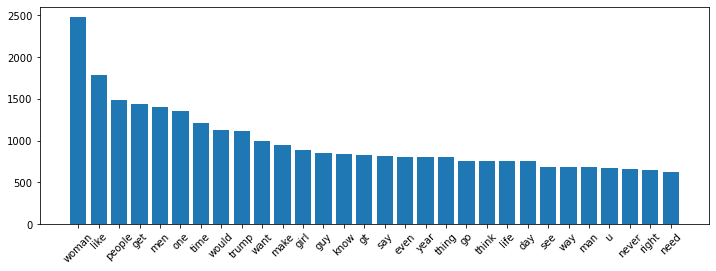

In [23]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [24]:
messy_df['finalized_text'] = messy_df['tokenned_stopped_text'].apply(lambda x: " ".join(x))

## Combine text by subreddit for clustering

In [25]:
agg_df = messy_df.drop(columns = ['created_utc', 'num_comments', 'subreddit_subscribers', 'upvote_ratio', 'image?', 'url'])

In [26]:
agg_df.head()

,subreddit,total_text,tokenned_stopped_text,finalized_text
0,TheRedPill,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim...",google fire ph.d biologist/engineer claiming a...
1,TheRedPill,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[get, laid, like, warlord, 37, rule, approachi...",get laid like warlord 37 rule approaching mode...
2,TheRedPill,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,...",practicing stoicism 3 year quality life increa...
3,TheRedPill,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi...",meta reddit roll first ban wave harassing subr...
4,TheRedPill,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,...",man get ex-gf pay child support reddit freak k...


In [27]:
total_text_dict = {}

for index, row in agg_df.iterrows():
    if row['subreddit'] in total_text_dict.keys():
        total_text_dict[row['subreddit']] = total_text_dict[row['subreddit']] + ' ' + row['finalized_text']
    else:
        print(row['subreddit'])
        total_text_dict[row['subreddit']] = row['finalized_text']

TheRedPill
BlackPeopleTwitter
WhitePeopleTwitter
politics
news
worldnews
Jokes
funny
gaming
technology
tech
space
nextfuckinglevel
dataisbeautiful
MurderedByWords
mildlyinteresting
mildlyinfuriating
wallstreetbets
shitposting
pcmasterrace
teenagers
PublicFreakout
memes
AskReddit
Gamingcirclejerk
dndmemes
nottheonion
gatesopencomeonin
wholesomememes
interestingasfuck
PoliticalCompassMemes
AskMen
AskWomen
MadeMeSmile
rareinsults
UFOs
todayilearned
halo
DnD
Minecraft
RoastMe
CryptoCurrency
cursedcomments
Wellthatsucks
barstoolsports
awfuleverything
unpopularopinion
povertyfinance
antiwork
SelfAwarewolves
niceguys
onejoke
Feminism
WitchesVsPatriarchy
AreTheStraightsOK
ToiletPaperUSA
LeopardsAteMyFace
TwoXChromosomes
Anarchism
TopMindsOfReddit
esist
MarchAgainstNazis
exredpill
MensLib
lgbt
AgainstHateSubreddits
traaaaaaannnnnnnnnns
trans
GenderCynical
EnoughTrumpSpam
ABoringDystopia
pointlesslygendered
Persecutionfetish
TheRightCantMeme
MurderedByAOC
LateStageCapitalism
TheBluePill
justneck

In [28]:
final_df = pd.DataFrame.from_dict(total_text_dict, orient = 'index')

In [29]:
final_df = final_df.rename(columns = {0 : 'text'})

In [30]:
# Pickle data for modeling

pd.to_pickle(final_df, '../data/preprocessed_df.pkl')

## Topic Modeling

In [31]:
lda_text = final_df['text'].apply(lambda x: x.split(" "))

In [32]:
corpus_dictionary = Dictionary(lda_text)
corpus = [corpus_dictionary.doc2bow(text) for text in lda_text]

In [35]:
lda = LdaModel(corpus, num_topics = 5, id2word= corpus_dictionary)

In [36]:
lda.print_topics(num_words = 20)

[(0,
  '0.006*"woman" + 0.006*"like" + 0.005*"get" + 0.005*"one" + 0.005*"would" + 0.004*"people" + 0.004*"time" + 0.004*"men" + 0.004*"say" + 0.004*"make" + 0.004*"guy" + 0.003*"trump" + 0.003*"want" + 0.003*"thing" + 0.003*"girl" + 0.003*"go" + 0.003*"need" + 0.003*"think" + 0.003*"u" + 0.003*"never"'),
 (1,
  '0.012*"woman" + 0.006*"like" + 0.006*"one" + 0.005*"men" + 0.005*"get" + 0.004*"trump" + 0.004*"people" + 0.004*"time" + 0.004*"gt" + 0.003*"want" + 0.003*"would" + 0.003*"girl" + 0.003*"make" + 0.003*"guy" + 0.003*"know" + 0.003*"year" + 0.003*"say" + 0.003*"go" + 0.003*"really" + 0.003*"day"'),
 (2,
  '0.008*"woman" + 0.006*"people" + 0.005*"like" + 0.005*"time" + 0.004*"men" + 0.004*"get" + 0.004*"would" + 0.003*"trump" + 0.003*"one" + 0.003*"year" + 0.003*"know" + 0.003*"guy" + 0.003*"u" + 0.003*"even" + 0.003*"day" + 0.003*"want" + 0.003*"right" + 0.002*"could" + 0.002*"make" + 0.002*"girl"'),
 (3,
  '0.008*"woman" + 0.006*"get" + 0.006*"people" + 0.005*"like" + 0.005*"on